### Задание.

Вспомнить и применить знания, полученные на протяжении всего курса. Получить полноценную работу, объединяющую в себе основные методики по работе с данными и алгоритмы машинного обучения.

#### Описание задания:

В лабораторной работе предлагается решить задачу классификации. Данные для выполнения работы можно скачать по ссылке, нажав на Data Folder. В датасете находится информация о флаге и базовых показателях страны. На основе доступной информации решается задача классификации стран по религии. Целевой признак мультиклассовый – religion. Остальные признаки описывают характерные черты флага и самой страны. Подробное описание признаков и их возможные значения можно прочесть на сайте.

Решение работы не высылается и будет разобрано на лекции.

##### Этапы работы:

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)


2.  Проведите первичный разведочный анализ данных.

    a) Проверьте данные на пропуски.
    b) Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).
    c) Визуализируйте распределение количества флагов по религиям.
    
    
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
Обучите любую модель классификации на выбор.


4. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики модели с помощью metrics.classification_report. Можно использовать любой другой альтернативный метод подсчета метрик.


5. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.

    a) Сделайте выводы.


6. Обработайте выбросы в данных.

    a) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot.
    b) Исследуйте признаки на выбросы. Удалите выбросы, если они были найдены/вы считаете это необходимым.


7. Проведите нормализацию признаков.
    a) Выберите признаки для нормализации, предложите способы для их обработки.


8. Повторите п. 4, п. 5.


9. Сбалансируйте классы путем oversampling/undersampling.
    a) Повторите п. 4, п. 5.


10. Уменьшите размерность пространства признаков.
    a) Повторите п. 4, п. 5.


11. Примените любой метод на ваше усмотрение для отбора признаков.
    a) Повторите п. 4, п. 5. Укажите количество выбранных признаков.


12. Оптимизируйте параметры модели из п. 4.
    a) Повторите п. 4, п. 5.


13. Обучите стекинг трех моделей, включая модель с оптимизированными параметрами.


14. Выберите результат с лучшими метриками и постройте для него Confusion Matrix.


    *Творческий пункт. Предложите что-то интересное для датасета.


15. Сделайте выводы.

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import scipy.stats
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 15,5
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import warnings
warnings.filterwarnings("ignore")

**1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)**

In [128]:
colnames = ('name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours', 'red', 'green',\
'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent',\
'triangle', 'icon', 'animate', 'text', 'topleft', 'botright')

In [129]:
flag = pd.read_csv('flag.data', names=colnames)

In [130]:
flag.head(5)

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [131]:
# flag.info()
flag.groupby('religion').count()

,name,landmass,zone,area,population,language,bars,stripes,colours,red,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
religion,,,,,,,,,,,,,,,,,,,,,
0,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
1,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
2,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
3,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
5,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
6,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
7,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


**2. Проведите первичный разведочный анализ данных.**


    a) Проверьте данные на пропуски.


    b) Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).


    c) Визуализируйте распределение количества флагов по религиям.


Ну, тут я сразу начну с корреляционной матрицы, посколкьу это самое логичное и показательное в рамках EDA.

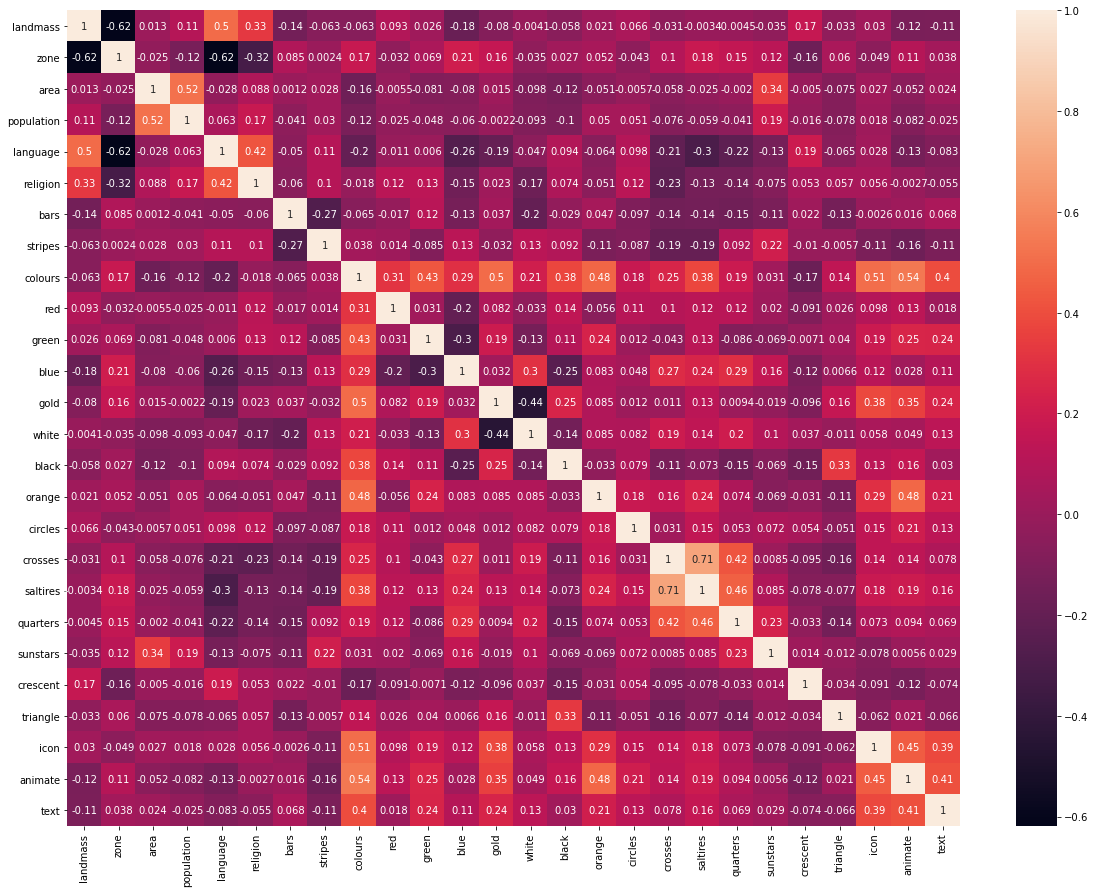

In [132]:
corr = flag.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)
plt.show()

Видим, что ряд колонок имеет неплохой (относительно всех остальных) показатель корреляции, но со знаком минус. На безрыбье будем использовать и их с небольшой модификацией

In [133]:
flag.zone = flag['zone']*-1
flag.blue = flag.blue*-1
flag.white = flag.white*-1
flag.stripes = flag.stripes*-1
flag.crosses = flag.crosses*-1
flag.quarters = flag.quarters*-1
flag.stripes = flag.stripes*-1
flag.saltires = flag.saltires*-1

In [143]:
flag_1 = pd.get_dummies(flag, columns=['mainhue', 'topleft', 'botright'])
# flag_1 = flag_1.drop(['mainhue', 'topleft', 'botright'], axis=1)
corr_c = flag_1.corr()


На выходе получаем следующую матрицу:


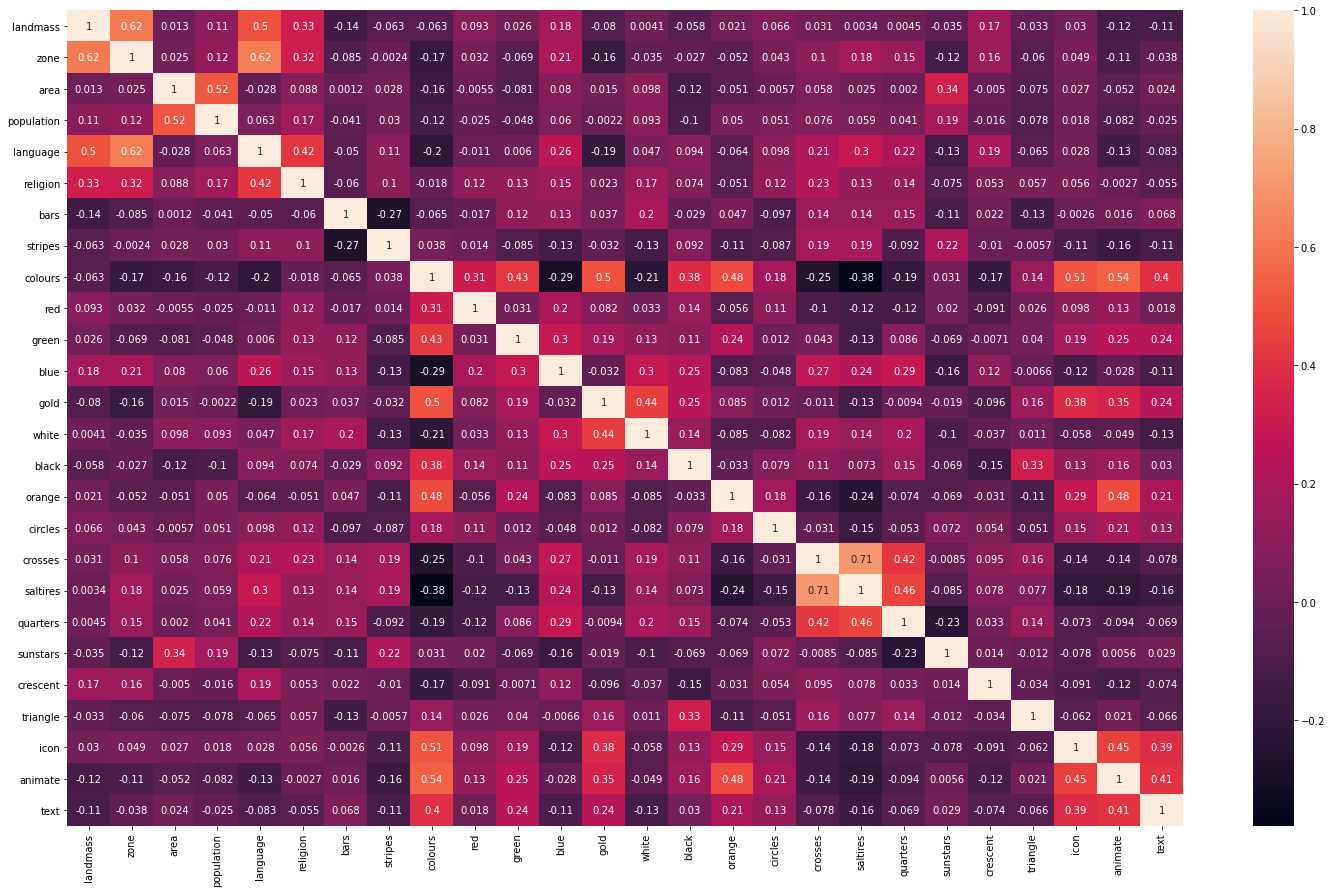

In [136]:
corr_b = flag.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr_b, annot=True)
plt.show()

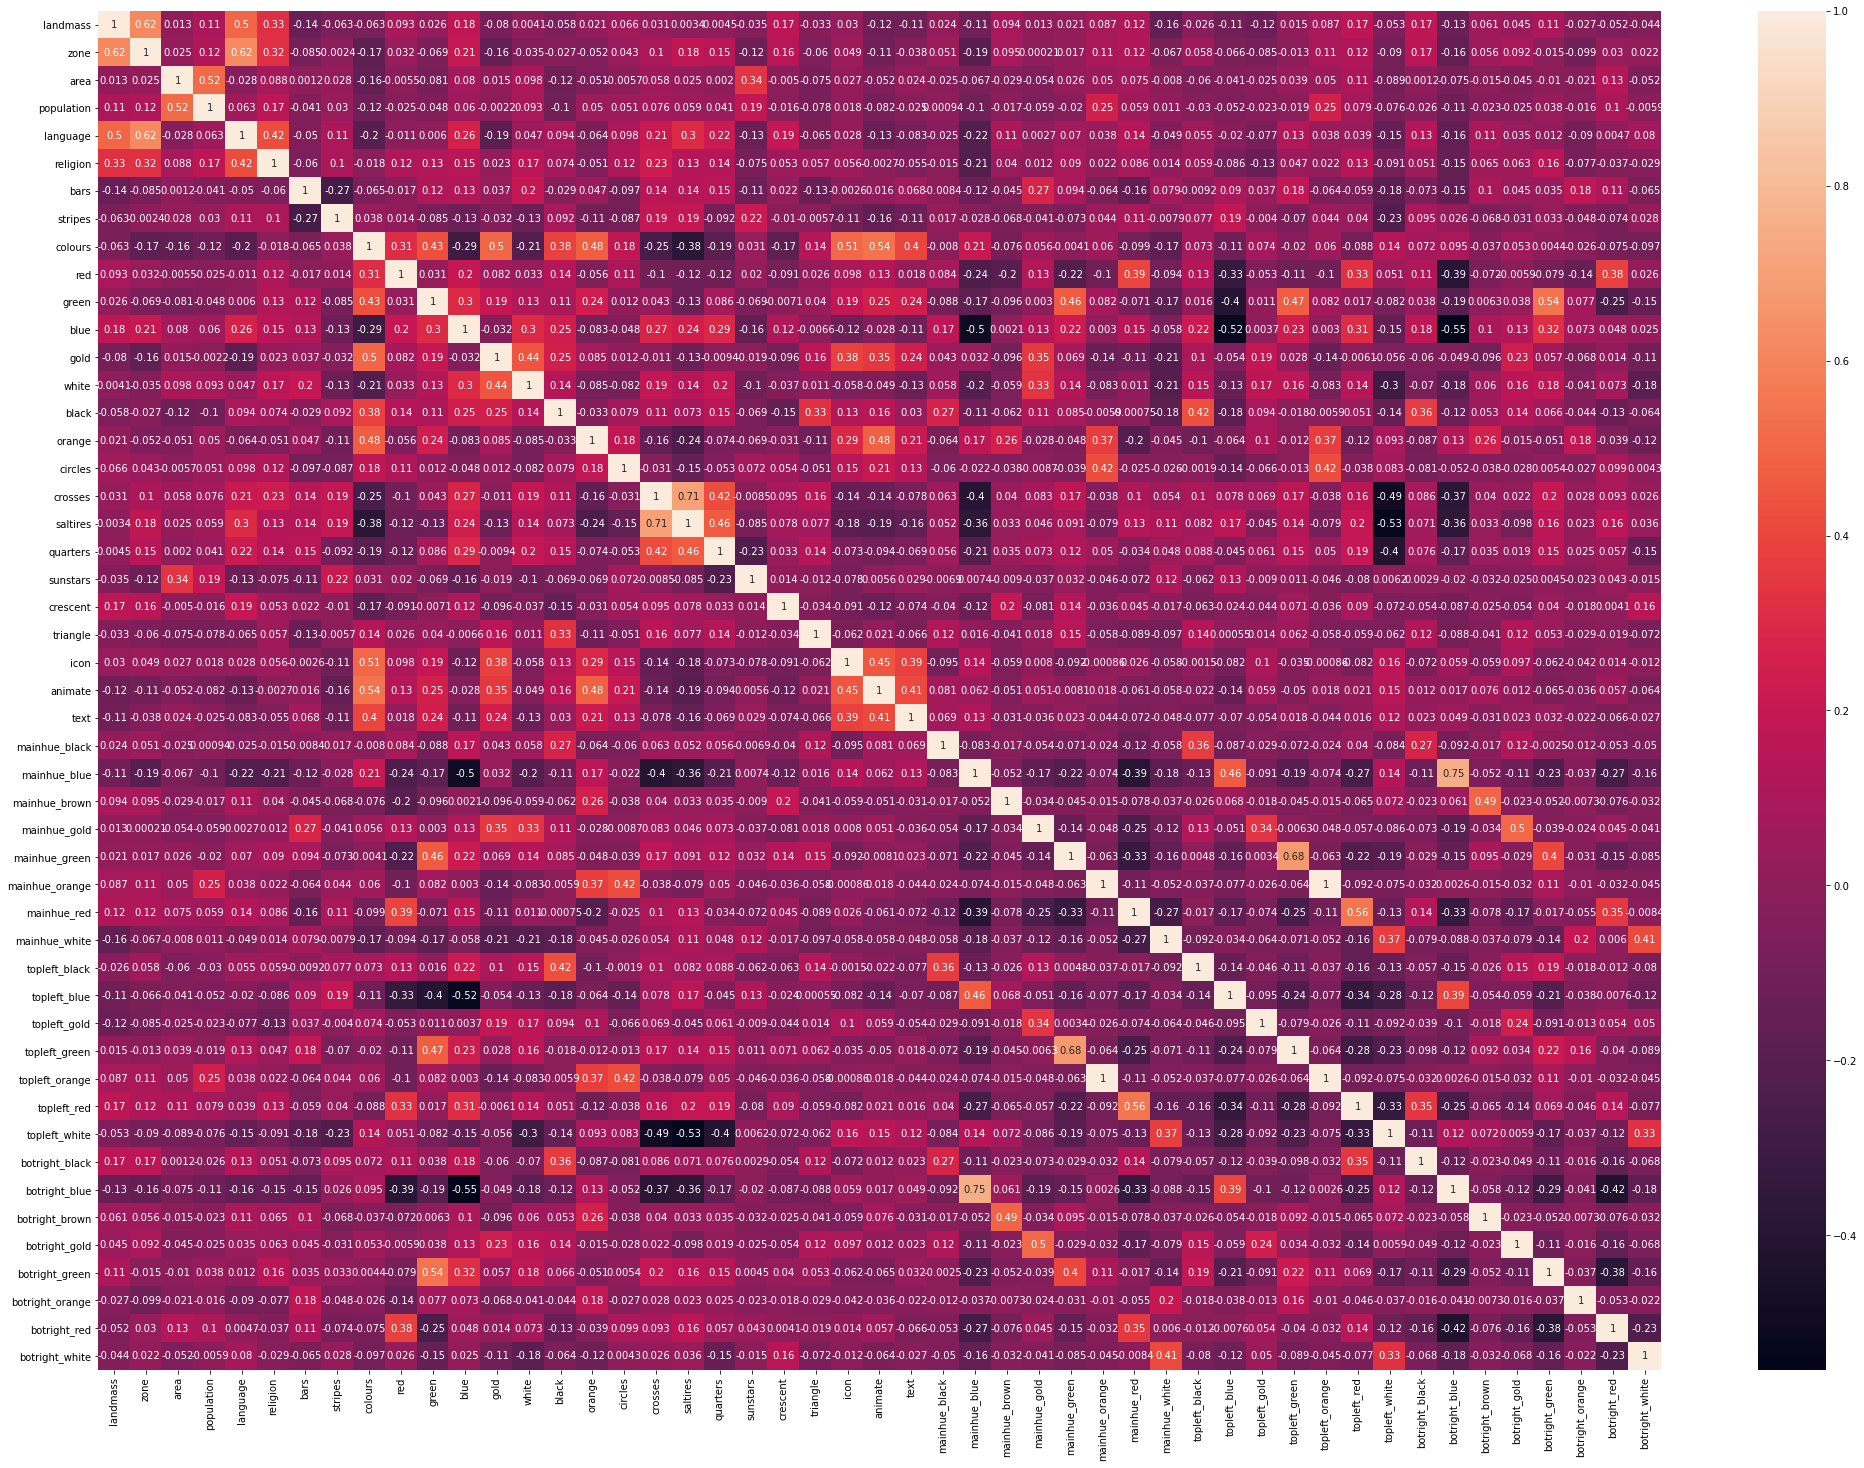

In [138]:
# X.info()
corr_c = flag_1.corr()
plt.figure(figsize=(35,25))
sns.heatmap(corr_c, annot=True)
plt.show()

In [144]:
flag_1.mainhue_blue = flag_1.mainhue_blue*-1
flag_1.topleft_gold = flag_1.topleft_gold*-1
flag_1.botright_blue = flag_1.botright_blue*-1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   landmass         194 non-null    int64
 1   zone             194 non-null    int64
 2   area             194 non-null    int64
 3   population       194 non-null    int64
 4   language         194 non-null    int64
 5   bars             194 non-null    int64
 6   stripes          194 non-null    int64
 7   colours          194 non-null    int64
 8   red              194 non-null    int64
 9   green            194 non-null    int64
 10  blue             194 non-null    int64
 11  gold             194 non-null    int64
 12  white            194 non-null    int64
 13  black            194 non-null    int64
 14  orange           194 non-null    int64
 15  circles          194 non-null    int64
 16  crosses          194 non-null    int64
 17  saltires         194 non-null    int64
 18  quarters  

In [83]:
# Le = LabelEncoder()


In [84]:
X.head()

,landmass,zone,area,population,language,bars,stripes,colours,red,green,...,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,5,-1,648,16,10,0,3,5,1,1,...,0,0,0,0,0,0,1,0,0,0
1,3,-1,29,3,6,0,0,3,1,0,...,1,0,0,0,0,0,0,0,1,0
2,4,-1,2388,20,8,2,0,3,1,1,...,0,0,0,0,0,0,0,0,0,1
3,6,-3,0,0,1,0,0,5,1,0,...,0,0,0,0,0,0,0,0,1,0
4,3,-1,0,0,6,3,0,3,1,0,...,0,0,0,0,0,0,0,0,1,0


**Идем дальше...**

**Разбивка по странам**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


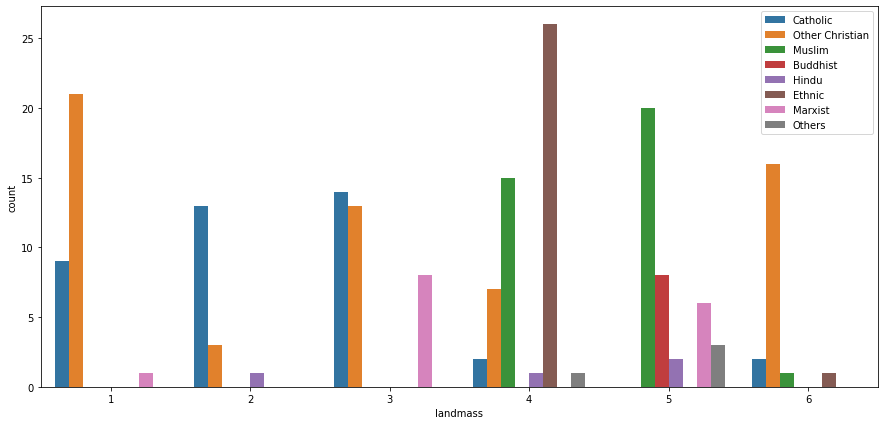

In [9]:
plt.figure(figsize=(15,7))
ax=sns.countplot(flag.landmass, hue=flag['religion'])
plt.legend(labels=['Catholic', 'Other Christian', 'Muslim', 'Buddhist', 'Hindu', 'Ethnic', 'Marxist', 'Others'])
sns.color_palette("mako", as_cmap=True) #цветовые палитры почему-то не работают
plt.show()

**количество по религиям**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


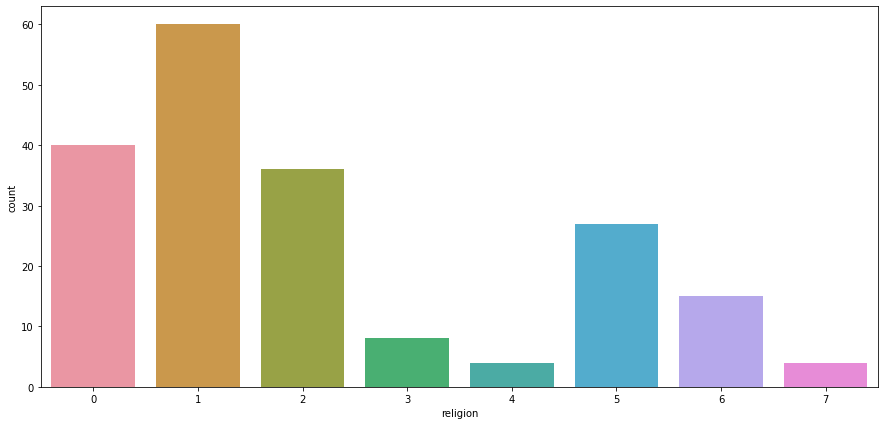

In [10]:
sns.set_palette("mako")
plt.figure(figsize=(15,7))
ax=sns.countplot(flag.religion)
# sns.color_palette("mako", as_cmap=True)


**Так же разбивка по религиям, но с легендой**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


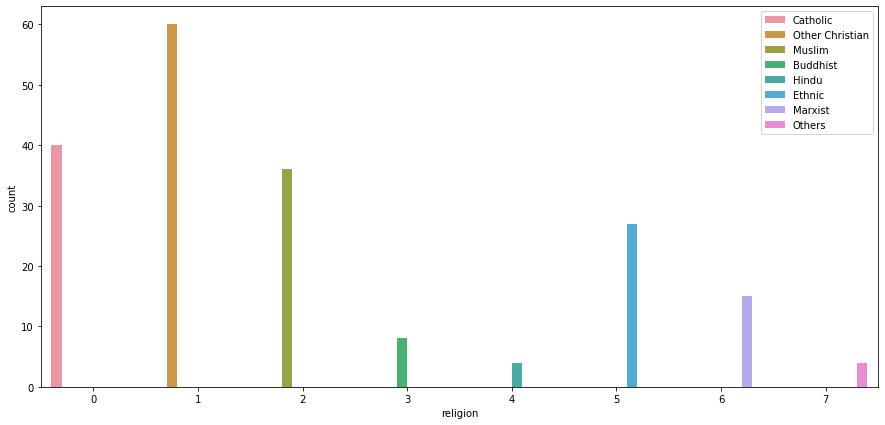

In [11]:
plt.figure(figsize=(15,7))
ax=sns.countplot(flag.religion, hue=flag['religion'])
plt.legend(labels=['Catholic', 'Other Christian', 'Muslim', 'Buddhist', 'Hindu', 'Ethnic', 'Marxist', 'Others'])
sns.color_palette("mako", as_cmap=True)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  BaggingRegressor

**3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое. Обучите любую модель классификации на выбор.**

In [13]:
X = flag.drop(['religion', 'name'], axis=1)

In [14]:
Y = pd.Series(flag.religion)

Тут есть важный момент:

забегая вперед скажу, что если использовать абсолютно все колонки, то модель логистической регресси, например, начинает дико ругаться и требовать расширения количества итераций. Приблизительно подобная история и с другими моделями. но даже если и запустить все в работу, то результат будет не сильно лучше отдельно отобранных колонок. поэтому далее я начал работать с датасетом из конкретных колонок, максимально коррелирующих с целевой переменной.

In [145]:
# X[['name']] = X[['name']].apply(le.fit_transform)
XX = X[['landmass', 'zone','language', 'population', 'red', 'green', 'blue', 'white', 'circles', 'stripes', 'crosses', 'quarters', 'saltires', 'mainhue_blue', 'topleft_gold', 'topleft_red', 'botright_blue', 'botright_green']]

In [146]:
XX.head()

,landmass,zone,language,population,red,green,blue,white,circles,stripes,crosses,quarters,saltires,mainhue_blue,topleft_gold,topleft_red,botright_blue,botright_green
0,5,-1,10,16,1,1,0,-1,0,3,0,0,0,0,0,0,0,1
1,3,-1,6,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,4,-1,8,20,1,1,0,-1,0,0,0,0,0,0,0,0,0,0
3,6,-3,1,0,1,0,-1,-1,0,0,0,0,0,1,0,0,0,0
4,3,-1,6,0,1,0,-1,0,0,0,0,0,0,0,0,0,0,0


In [550]:
X_train, X_test, y_train, y_test = train_test_split(XX, Y, test_size=0.2, random_state=4)

In [552]:
model = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=444)

In [551]:
y_test.value_counts()

1    13
5     7
2     6
0     5
6     3
4     2
7     2
3     1
Name: religion, dtype: int64

In [553]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=444)

In [554]:
model.score(X_test, y_test)

0.41025641025641024

In [555]:
from sklearn.metrics import classification_report
y_true = Y
y_pred = model.predict(XX)
target_names = ['Catholic', 'Other Christian', 'Muslim', 'Buddhist', 'Hindu', 'Ethnic', 'Marxist', 'Others']
print(classification_report(y_true, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

       Catholic       0.53      0.62      0.57        40
Other Christian       0.67      0.48      0.56        60
         Muslim       0.55      0.75      0.64        36
       Buddhist       0.43      0.38      0.40         8
          Hindu       1.00      0.25      0.40         4
         Ethnic       0.53      0.63      0.58        27
        Marxist       0.57      0.53      0.55        15
         Others       0.00      0.00      0.00         4

       accuracy                           0.57       194
      macro avg       0.54      0.46      0.46       194
   weighted avg       0.58      0.57      0.56       194



In [333]:
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=4, random_state=0)

In [556]:
dtclf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [557]:
print('Decision Tree Classifier result:', round(dtclf.score(X_test, y_test), 3)*100,'%')

Decision Tree Classifier result: 56.39999999999999 %


In [558]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=20, criterion='gini', max_depth=4, random_state=0)

In [559]:
rfclf.fit(X_train, y_train)
print('Random Forest Classifier result:', round(rfclf.score(X_test, y_test), 3)*100, '%')

Random Forest Classifier result: 61.5 %


Как итог на данной стадии, Random Forest показал лучший результат из трех вариантов. Скажу больше: если убрать из списка колонок 'mainhue_blue', 'topleft_gold', 'topleft_red', 'botright_blue', 'botright_green', то качество вырастет до 74,4%

**6. Обработайте выбросы в данных.**

    a) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. 
    
    b) Исследуйте признаки на выбросы. Удалите выбросы, если они были найдены/вы считаете это необходимым.

<AxesSubplot:xlabel='variable', ylabel='value'>

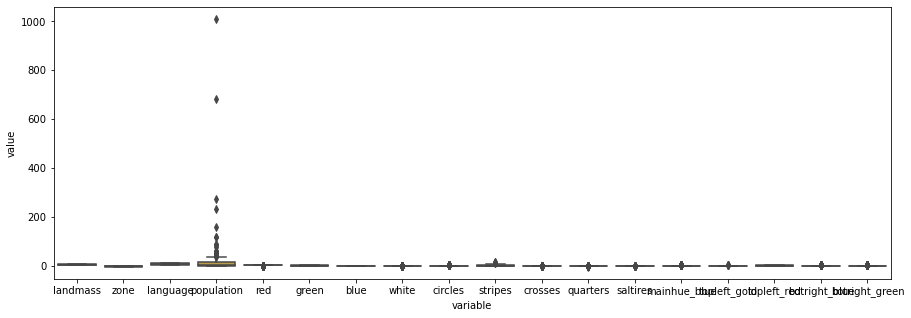

In [560]:
sns.boxplot(x="variable", y="value", data=pd.melt(XX))

**7. Проведите нормализацию признаков.**

    a) Выберите признаки для нормализации, предложите способы для их обработки.

In [561]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_features = scaler.fit_transform(XX)

In [340]:
X_fd = pd.DataFrame(X_features, index=XX.index, columns=XX.columns)
X_fd

,landmass,zone,language,population,red,green,blue,white,circles,stripes,crosses,quarters,saltires,mainhue_blue,topleft_gold,topleft_red,botright_blue,botright_green
0,0.921773,0.928303,1.336144,-0.079262,0.517662,1.063893,1.020836,-0.573382,-0.368284,0.623796,0.388885,0.343852,0.319801,-0.509647,-0.178647,-0.637022,-0.565445,1.962142
1,-0.369375,0.928303,0.189189,-0.221033,0.517662,-0.939944,1.020836,1.744037,-0.368284,-0.668195,0.388885,0.343852,0.319801,-0.509647,-0.178647,1.569804,-0.565445,-0.509647
2,0.276199,0.928303,0.762666,-0.035640,0.517662,1.063893,1.020836,-0.573382,-0.368284,-0.668195,0.388885,0.343852,0.319801,-0.509647,-0.178647,-0.637022,-0.565445,-0.509647
3,1.567346,-0.604384,-1.244506,-0.253750,0.517662,-0.939944,-0.979590,-0.573382,-0.368284,-0.668195,0.388885,0.343852,0.319801,1.962142,-0.178647,-0.637022,-0.565445,-0.509647
4,-0.369375,0.928303,0.189189,-0.253750,0.517662,-0.939944,-0.979590,1.744037,-0.368284,-0.668195,0.388885,0.343852,0.319801,-0.509647,-0.178647,-0.637022,-0.565445,-0.509647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1.567346,-0.604384,-1.244506,-0.253750,0.517662,-0.939944,-0.979590,-0.573382,-0.368284,-0.668195,0.388885,-1.956399,0.319801,-0.509647,-0.178647,-0.637022,-0.565445,-0.509647
190,-0.369375,0.928303,0.189189,-0.013829,0.517662,-0.939944,-0.979590,-0.573382,-0.368284,0.623796,0.388885,0.343852,0.319801,-0.509647,-0.178647,-0.637022,-0.565445,-0.509647
191,0.276199,0.161959,1.336144,0.051604,0.517662,1.063893,1.020836,1.744037,1.796781,-0.668195,0.388885,0.343852,0.319801,-0.509647,-0.178647,-0.637022,-0.565445,1.962142
192,0.276199,0.161959,1.336144,-0.188317,0.517662,1.063893,1.020836,1.744037,-0.368284,-0.668195,0.388885,0.343852,0.319801,-0.509647,-0.178647,-0.637022,-0.565445,-0.509647


<AxesSubplot:xlabel='variable', ylabel='value'>

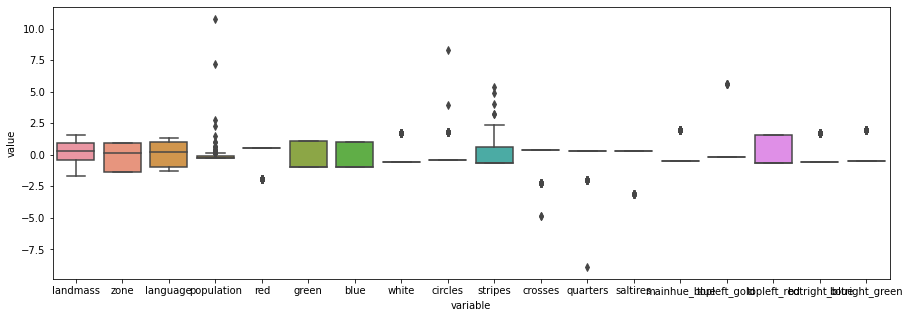

In [341]:
sns.boxplot(x="variable", y="value", data=pd.melt(X_fd))

In [467]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_fd, Y, test_size=0.2, random_state=4)

In [468]:
ys_test.value_counts()

1    13
5     7
2     6
0     5
6     3
4     2
7     2
3     1
Name: religion, dtype: int64

In [469]:
rfclf.fit(Xs_train, ys_train)


RandomForestClassifier(max_depth=4, n_estimators=20, random_state=0)

In [470]:
print('Random Forest Classifier result:', round(rfclf.score(Xs_test, ys_test), 3)*100, '%')

Random Forest Classifier result: 61.5 %


**Вывод:**

Что-то не сильно помогло.... Тут еще один интересный момент заметил. При разделении выборки на тестовую и тренировочную и фиксацию random state получается, что полнота тестовой части целевой переменной (которая ys_test) совершенно не взаимосвязана с итоговым качеством обучения модели. То есть в ys_test может попасть не вся выборка классов, но при этом качество модели будет даже лучше.

**9. Сбалансируйте классы путем oversampling/undersampling. a) Повторите п. 4, п. 5.**

In [471]:
from collections import Counter
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=1, n_neighbors=3)
Xu, yu = undersample.fit_resample(X_fd, Y)

In [515]:
Xu_train, Xu_test, yu_train, yu_test = train_test_split(Xu, yu, test_size=0.2, random_state=44)

In [516]:
yu_test.value_counts()

0    1
2    1
3    1
4    1
5    1
6    1
7    1
Name: religion, dtype: int64

In [517]:
rfclf.fit(Xu_train, yu_train)
dtclf.fit(Xu_train, yu_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [518]:
print('Random Forest Classifier result:', round(rfclf.score(Xu_test, yu_test), 3)*100, '%')

Random Forest Classifier result: 42.9 %


In [519]:
print('Decision Tree Classifier result:', round(dtclf.score(Xu_test, yu_test), 3)*100,'%')

Decision Tree Classifier result: 14.299999999999999 %


In [520]:
model_u = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=15)

In [521]:
model_u.fit(Xu_train, yu_train)

LogisticRegression(max_iter=10000, random_state=15)

In [522]:
print('Logistic Regression Classifier result:', round(model_u.score(Xu_test, yu_test), 3)*100, '%')

Logistic Regression Classifier result: 42.9 %


Вывод: в целом, стало еще хуже. Причем, я пробовал как брать вct колонки датасета (полный X), так и выборочно только те, что имели максимальную корреляцию.

**10. Уменьшите размерность пространства признаков.**

**a) Повторите п. 4, п. 5.**
    

Собсно, я их и так уже отобрал  с помощью корреляционной матрицы. Ну, давайте еще другой метод используем...

**11. Примените любой метод на ваше усмотрение для отбора признаков.**

**a) Повторите п. 4, п. 5. Укажите количество выбранных признаков.**

In [523]:
from sklearn.decomposition import PCA

In [524]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=5)
selector.fit(X_fd, Y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

In [525]:
legend = list(X_fd.columns)
# legend

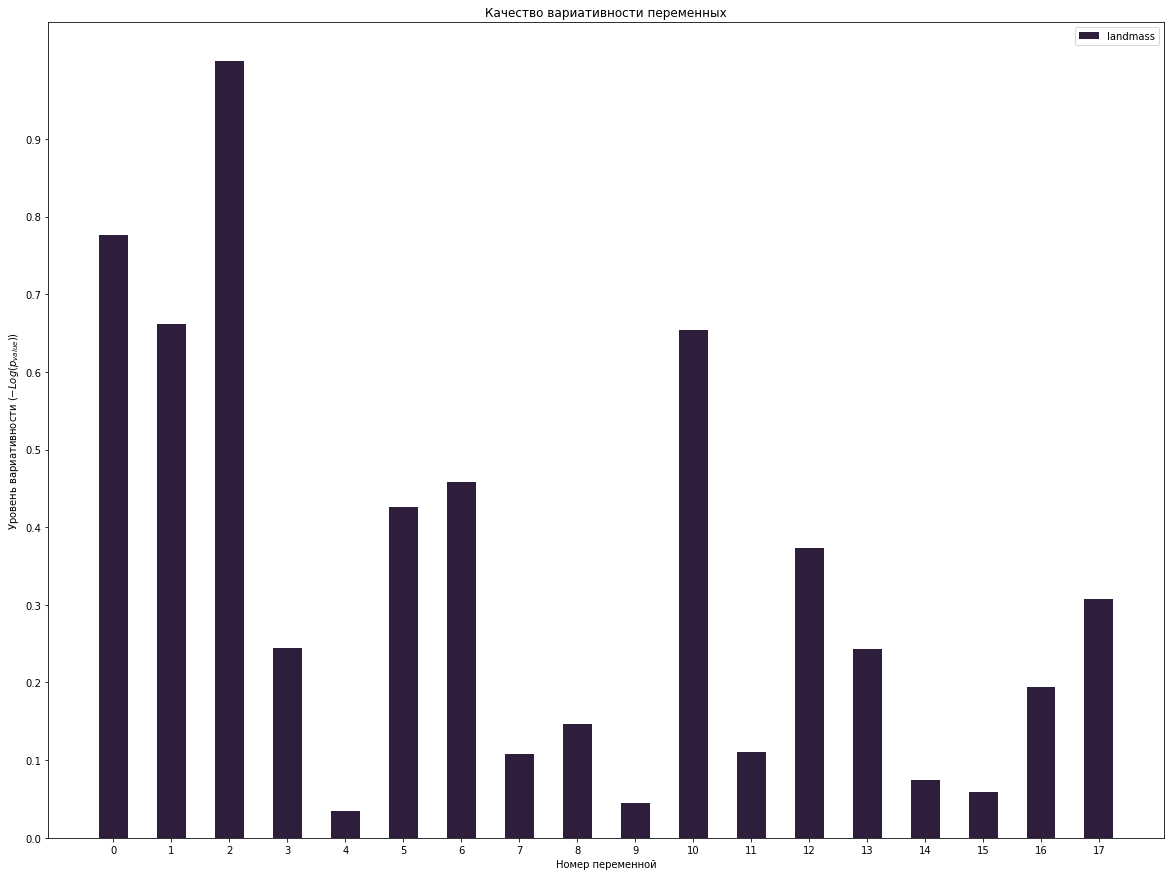

In [443]:
import matplotlib.pyplot as plt

X_indices = np.arange(X_fd.shape[-1])
plt.figure(figsize=(20,15))
plt.clf()
plt.bar(X_indices, scores, width=0.5)
plt.title("Качество вариативности переменных")
plt.xlabel("Номер переменной")
plt.ylabel(r"Уровень вариативности ($-Log(p_{value})$)")
plt.xticks(range(0,18, 1))
plt.yticks(np.arange(0,1,0.1))
plt.legend(legend)# я не понимаю, почему здесь не отображается весь список. пробовал загонять списком, но результат такой же
plt.show()

In [444]:
print(*legend, sep=", ")

landmass, zone, language, population, red, green, blue, white, circles, stripes, crosses, quarters, saltires, mainhue_blue, topleft_gold, topleft_red, botright_blue, botright_green


In [445]:
Xopt = X_fd[['landmass', 'zone','language', 'green', 'blue', 'crosses']]

In [526]:
Xxx_train, Xxx_test, yyy_train, yyy_test = train_test_split(Xopt, Y, test_size=0.2, random_state=4)

In [459]:
yyy_test.value_counts()

1    13
5     7
2     6
0     5
6     3
4     2
7     2
3     1
Name: religion, dtype: int64

In [527]:
model_opt = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=13)
model_opt.fit(Xxx_train, yyy_train)

LogisticRegression(max_iter=10000, random_state=13)

In [528]:
print('Logistic Regression Classifier result:', round(model_opt.score(Xxx_test, yyy_test), 3)*100, '%')

Logistic Regression Classifier result: 43.6 %


In [529]:
DTc = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=4, random_state=0)
RFc = RandomForestClassifier(n_estimators=20, criterion='gini', max_depth=4, random_state=0)
LR = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=444)

In [530]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
estimators = [('Decision Tree Classifier', DTc), ('Logistic regression Classifier', LR), ('Random Forest Classifier', RFc), ('svr', LinearSVC(penalty='l2', loss='squared_hinge', tol=0.0001, random_state=42, max_iter=2000))]
stack_clf = StackingClassifier(estimators=estimators)

In [531]:
stack_clf.fit(Xxx_train, yyy_train)
Y_pred_stack = stack_clf.predict(Xxx_test)

In [305]:
target_names = ['Catholic', 'Other Christian', 'Muslim', 'Buddhist', 'Hindu', 'Ethnic', 'Marxist', 'Others']


In [569]:
print('Stacking Classifier result:\n\n', classification_report(yyy_test, Y_pred_stack))

Stacking Classifier result:

               precision    recall  f1-score   support

           0       0.50      0.80      0.62         5
           1       0.79      0.85      0.81        13
           2       0.33      0.67      0.44         6
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.80      0.57      0.67         7
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2

    accuracy                           0.59        39
   macro avg       0.30      0.36      0.32        39
weighted avg       0.52      0.59      0.54        39



In [568]:
stack_clf.fit(Xs_train, ys_train)
Y_pred_stack_1 = stack_clf.predict(Xs_test)
print('Stacking Classifier result:\n\n', classification_report(ys_test, Y_pred_stack_1))

Stacking Classifier result:

               precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.91      0.77      0.83        13
           2       0.45      0.83      0.59         6
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.60      0.43      0.50         7
           6       0.50      0.67      0.57         3
           7       0.00      0.00      0.00         2

    accuracy                           0.59        39
   macro avg       0.37      0.41      0.38        39
weighted avg       0.58      0.59      0.57        39



In [567]:
stack_clf.fit(X_train, y_train)
Y_pred_stack_2 = stack_clf.predict(X_test)
print('Stacking Classifier result:\n\n', classification_report(y_test, Y_pred_stack_2))


Stacking Classifier result:

               precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.85      0.85      0.85        13
           2       0.50      0.83      0.62         6
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.67      0.57      0.62         7
           6       0.25      0.33      0.29         3
           7       0.00      0.00      0.00         2

    accuracy                           0.59        39
   macro avg       0.35      0.37      0.35        39
weighted avg       0.56      0.59      0.57        39



В итоге, посл использования различных вариантов оказалось, что оптимальным был вариант модели random forest classifier на данных без нормализации и стандартизации со следующими колонками:

'landmass', 'zone','language', 'population', 'red', 'green', 'blue', 'white', 'circles', 'stripes', 'crosses', 'quarters', 'saltires'

In [312]:
Xbest = X[['landmass', 'zone','language', 'population', 'red', 'green', 'blue', 'white', 'circles', 'stripes', 'crosses', 'quarters', 'saltires']]

In [548]:
Xbest_train, Xbest_test, ybest_train, ybest_test = train_test_split(Xbest, Y, test_size=0.2, random_state=4)

In [563]:
RFc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=20, random_state=0)

In [566]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

При визуализации Confusion matrix крайне важно, чтобы в тестовой выборке присутствовали все искомые классы целевой переменной. И здесь возникает интересный вопрос: либо мы эксперементируем с random state для получения лучшего качества модели, либо же мы стремимся получить полноту тестовой выборки. Лично мне кажется, что второй вариант более честный, а первый попахивает подгонкой.

Ниже реализованы визуализации confusin matrix для двух моделей с лучшими, как я считаю, показателями.

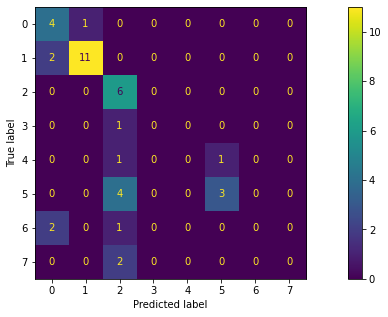

In [571]:
y_best_pred = RFc.predict(X_test)
cm = confusion_matrix(y_test, y_best_pred)
ConfusionMatrixDisplay(cm, RFc.classes_).plot()

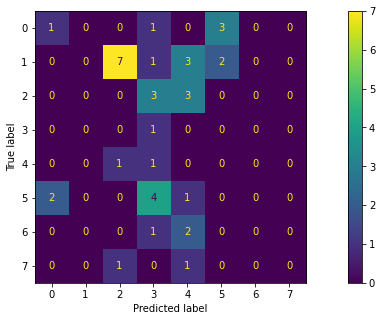

In [570]:
y_best_first__pred = stack_clf.predict(X_test)
cm = confusion_matrix(y_test, y_best_first__pred)
ConfusionMatrixDisplay(cm, stack_clf.classes_).plot()